
# Answers to the questions

### Question 1

The Driver ID with the most trips is: 8470311935249.  
The number of trips this driver made: 3313.  

### Question 2

Riyadh had the highest average trips per Driver.  

### Question 3

The 9th month, which is September, had the 3rd lowest number of signups in Munich.  

### Question 4

Riyadh has the fastest average time for a driver to complete the funnel  

### Question 5

The number of days it took on average to go from Regular to Bind Car for a 'Driver
from fleet', in Panama City, during 2021 is: 6.85

## Contained below is the Python code showing how I came about the answers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the excel file into the dataframe

In [2]:
 df = pd.read_excel("DiDi UK - Operations Intern Take Home Test_ Raw Data.xlsx")

In [3]:
df.tail()

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,main_channel,car_factory_year,brand_id,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips
15382,8470312008475,Driver from fleet,Munich,Sign up,2021-04-13,Not regular,NaT,Not bind car,NaT,Not available,...,Referral,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN
15383,8470312008490,Driver from fleet,Panama City,Sign up,2021-04-13,Regular,2021-04-13,Not bind car,NaT,Not available,...,Organic,NaN,NaN,NaN,2021-04-13,NaT,NaT,NaT,NaN,NaN
15384,8470312008570,Driver from fleet,Panama City,Sign up,2021-04-13,Not regular,NaT,Not bind car,NaT,Not available,...,Referral,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN
15385,8470312008573,Driver from fleet,Panama City,Sign up,2021-04-13,Not regular,NaT,Not bind car,NaT,Not available,...,Offline,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN
15386,8470312008583,Driver from fleet,Munich,Sign up,2021-04-13,Not regular,NaT,Not bind car,NaT,Not available,...,Referral,NaN,NaN,NaN,2021-04-13,NaT,NaT,NaT,NaN,NaN


In [4]:
print(df.shape)

(15387, 21)


In [5]:
print(df.describe())

          driver id  car_factory_year      brand_id  acceptance        trips
count  1.538700e+04       8280.000000  8.280000e+03  6766.00000  6766.000000
mean   8.470312e+12       2013.478502  1.014258e+06   258.21209   191.241649
std    2.602018e+04          4.017629  2.547358e+02   431.31457   308.374662
min    8.470312e+12       1997.000000  1.013565e+06     1.00000     0.000000
25%    8.470312e+12       2011.000000  1.014091e+06    18.00000    14.000000
50%    8.470312e+12       2014.000000  1.014309e+06    97.00000    75.000000
75%    8.470312e+12       2017.000000  1.014478e+06   284.00000   219.000000
max    8.470312e+12       2021.000000  1.015148e+06  3984.00000  2733.000000


### To see how many unique values are inside the driver_city_name column of the dataframe

In [6]:
print(df["driver_city_name"].unique())

['Riyadh' 'Panama City' 'Munich']


### To view how many duplicate rows exist within the dataset

In [7]:
print(df.duplicated().value_counts())

False    15374
True        13
dtype: int64


### Dropping the duplicate rows from the dataset

In [8]:
new_df = df.drop_duplicates()

In [9]:
print(new_df.shape) 

(15374, 21)


### To view the number of null values exist within each column in the dataset

In [10]:
print(new_df.isna().sum())

driver id                     0
driver_role                   0
driver_city_name              0
sign_up                       0
sign_up_date                  0
regular                       0
regular_date               6002
bind_car                      0
bind_car_date              5948
available                     0
available_date             7853
main_channel                151
car_factory_year           7094
brand_id                   7094
inn_id                    15123
first_download_time        6390
driver_first_trip_date     8778
driver_last_trip_date      8778
car_first_trip_date        9147
acceptance                 8608
trips                      8608
dtype: int64


### To view how repeating this particular driver id (8470311935236) that repeats appears in the dataframe

In [11]:
new_df[new_df["driver id"] == 8470311935236]

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,main_channel,car_factory_year,brand_id,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips
1002,8470311935236,Driver from fleet,Panama City,Sign up,2020-12-17,Regular,2020-12-21,Bind car,2020-12-17,Not available,...,NaN,2020.0,1013819.0,NaN,2020-12-17,NaT,NaT,NaT,NaN,NaN
1003,8470311935236,Driver from fleet,Panama City,Sign up,2020-12-28,Not regular,NaT,Not bind car,NaT,Not available,...,Organic,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN
1004,8470311935236,Driver from fleet,Panama City,Sign up,2020-12-17,Regular,2020-12-20,Bind car,2021-01-25,Available,...,Fleet,2018.0,1014497.0,NaN,2020-12-17,2021-01-12,2021-04-13,2021-01-26,437.0,377.0
1005,8470311935236,Driver from fleet,Munich,Sign up,2020-12-17,Regular,2020-12-22,Bind car,2020-12-23,Available,...,Fleet,2012.0,1014255.0,NaN,NaT,2021-01-11,2021-04-02,2021-01-11,443.0,294.0
1006,8470311935236,Driver from fleet,Munich,Sign up,2020-12-17,Regular,2020-12-24,Bind car,2020-12-25,Available,...,Organic,2010.0,1013680.0,NaN,2020-10-04,2021-01-11,2021-02-09,2021-01-11,212.0,167.0
1007,8470311935236,Driver from fleet,Munich,Sign up,2020-12-17,Regular,2021-01-01,Bind car,2021-02-04,Available,...,Organic,2014.0,1014395.0,NaN,2020-12-17,2021-02-07,2021-02-23,2021-02-07,53.0,37.0
1008,8470311935236,Driver from fleet,Riyadh,Sign up,2020-12-17,Not regular,NaT,Bind car,2020-12-17,Not available,...,Fleet,2019.0,1014497.0,NaN,2020-12-17,2021-01-14,2021-01-19,2021-01-14,17.0,16.0


### Creating a new dataframe 

In [12]:
group_id = new_df.groupby("driver id", as_index = False)["trips"].sum()

In [13]:
group_id.count() #number of rows in the grouped dataframe

driver id    12839
trips        12839
dtype: int64

In [14]:
group_id.shape

(12839, 2)

In [15]:
print(group_id.head())

       driver id  trips
0  8470311823362   27.0
1  8470311842205  467.0
2  8470311842215    0.0
3  8470311842386  948.0
4  8470311842388    0.0


In [16]:
group_id.describe() #to know the max no. of trips made by a driver

,driver id,trips
count,1.283900e+04,12839.000000
mean,8.470312e+12,100.782070
std,2.725333e+04,261.786481
min,8.470312e+12,0.000000
25%,8.470312e+12,0.000000
50%,8.470312e+12,0.000000
75%,8.470312e+12,73.000000
max,8.470312e+12,3313.000000


### A function to obtain the Driver ID with the most trips

In [17]:
max_value = 0
for i in range (12839):
    value = group_id.iloc[i, 1]
    if value > max_value:
        max_value = value
        driver_id = group_id.iloc[i, 0]

print("The Driver ID with the most trips is: {}".format(driver_id))
print("The number of trips this driver made: {}".format(max_value))

The Driver ID with the most trips is: 8470311935249
The number of trips this driver made: 3313.0


In [18]:
df_dropnulltrips = new_df.dropna(subset = ["trips"])#to see if dropping null values in trips column affects its mean; I'm expecting it does

In [19]:
df_dropnulltrips.shape

(6766, 21)

In [20]:
df_dropnulltrips.head()

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,main_channel,car_factory_year,brand_id,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips
0,8470311823362,Driver from fleet,Riyadh,Sign up,2020-12-16,Regular,2020-12-18,Bind car,2020-12-18,Available,...,Organic,2018.0,1014091.0,NaN,2020-12-16,2021-01-20,2021-01-22,2021-01-20,32.0,27.0
1,8470311842205,Driver from fleet,Panama City,Sign up,2020-12-09,Regular,2021-01-04,Bind car,2021-03-12,Available,...,Organic,2015.0,1014167.0,NaN,2020-09-03,2021-01-12,2021-04-08,2021-03-12,897.0,467.0
3,8470311842386,Driver from fleet,Panama City,Sign up,2020-09-09,Regular,2020-09-15,Bind car,2021-01-21,Available,...,Organic,2014.0,1014493.0,NaN,2020-09-05,2021-01-23,2021-04-08,2021-01-23,1399.0,948.0
5,8470311842445,Driver from fleet,Munich,Sign up,2020-12-17,Regular,2020-12-21,Bind car,2021-01-04,Available,...,Organic,2008.0,1014309.0,NaN,2020-09-09,2021-01-27,2021-04-13,2021-01-27,1543.0,1030.0
7,8470311842465,Driver from fleet,Riyadh,Sign up,2020-12-31,Regular,2021-01-02,Bind car,2020-12-31,Not available,...,Fleet,2017.0,1014493.0,NaN,2020-09-08,2021-01-11,2021-03-20,2021-01-11,256.0,212.0


In [21]:
df_dropnulltrips[df_dropnulltrips["trips"] == 0]

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,main_channel,car_factory_year,brand_id,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips
55,8470311842996,Driver from fleet,Munich,Sign up,2020-12-18,Regular,2020-12-29,Bind car,2020-12-30,Available,...,Organic,2016.0,1014478.0,NaN,2020-09-15,NaT,NaT,NaT,2.0,0.0
80,8470311843264,Driver from fleet,Munich,Sign up,2020-09-23,Regular,2020-09-23,Bind car,2021-01-06,Available,...,Organic,2018.0,1014497.0,NaN,2020-09-29,NaT,NaT,NaT,1.0,0.0
116,8470311843755,Driver from fleet,Riyadh,Sign up,2020-12-27,Regular,2020-12-27,Bind car,2020-12-27,Available,...,Organic,2015.0,1014478.0,NaN,2020-10-01,NaT,NaT,NaT,1.0,0.0
132,8470311843933,Driver-IE,Munich,Sign up,2020-12-18,Regular,2020-12-22,Bind car,2020-12-18,Available,...,Organic,2013.0,1014309.0,NaN,2020-10-07,NaT,NaT,NaT,1.0,0.0
143,8470311844195,Driver from fleet,Munich,Sign up,2020-12-16,Regular,2020-12-21,Bind car,2021-01-27,Available,...,Fleet,2007.0,1014421.0,NaN,2020-10-07,NaT,NaT,NaT,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14186,8470311995163,Driver from fleet,Riyadh,Sign up,2021-03-15,Regular,2021-03-15,Bind car,2021-03-15,Available,...,Referral,2014.0,1014478.0,NaN,2021-03-15,NaT,NaT,NaT,8.0,0.0
14382,8470311996770,Driver from fleet,Panama City,Sign up,2021-03-18,Regular,2021-03-18,Bind car,2021-03-18,Available,...,Organic,2018.0,1014497.0,NaN,2021-03-18,NaT,NaT,NaT,1.0,0.0
14942,8470312002689,Driver from fleet,Panama City,Sign up,2021-04-01,Regular,2021-04-01,Bind car,2021-04-01,Available,...,Organic,2008.0,1013967.0,NaN,2021-04-01,NaT,NaT,NaT,2.0,0.0
15260,8470312006324,Driver from fleet,Riyadh,Sign up,2021-04-09,Regular,2021-04-09,Bind car,2021-04-09,Available,...,Fleet,2015.0,1015036.0,NaN,2021-04-09,NaT,NaT,NaT,1.0,0.0


In [22]:
group_city_nonulltrips = df_dropnulltrips.groupby(["driver_city_name", "driver id"], as_index = False)["trips"].mean()

In [23]:
group_city_nonulltrips.describe()

,driver id,trips
count,6.517000e+03,6517.000000
mean,8.470312e+12,189.368268
std,2.588553e+04,302.823062
min,8.470312e+12,0.000000
25%,8.470312e+12,14.000000
50%,8.470312e+12,77.000000
75%,8.470312e+12,218.000000
max,8.470312e+12,2733.000000


In [24]:
group_city_nonulltrips.head()

,driver_city_name,driver id,trips
0,Munich,8470311842445,1030.0
1,Munich,8470311842619,79.0
2,Munich,8470311842646,468.0
3,Munich,8470311842667,99.0
4,Munich,8470311842705,861.0


In [25]:
group_by_city = group_city_nonulltrips.groupby("driver_city_name", as_index = False)["trips"].mean()

In [26]:
group_by_city.head()

,driver_city_name,trips
0,Munich,185.991615
1,Panama City,188.364530
2,Riyadh,192.999059


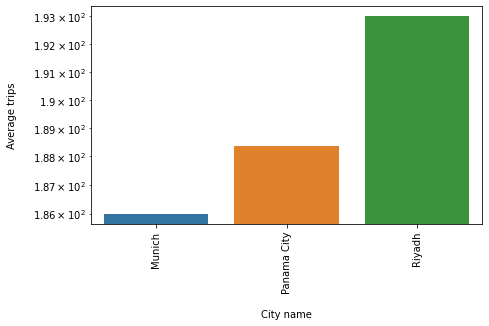

In [27]:
plt.figure(figsize = (7, 4))
plt.xticks(rotation = 90)
plot1 = sns.barplot(data = group_by_city, x = "driver_city_name", y = "trips" )
plot1.set_yscale("log") #using the log scale to better see which city has the highest avg trips
plt.xlabel("\nCity name")
plt.ylabel("Average trips\n")
#plt.title
plt.show()

In [28]:
new_df["sign_up_month"] = new_df.loc[:, "sign_up_date"].dt.month

<ipython-input-28-b3611bd9d7ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["sign_up_month"] = new_df.loc[:, "sign_up_date"].dt.month


In [29]:
new_df.head()

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,car_factory_year,brand_id,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips,sign_up_month
0,8470311823362,Driver from fleet,Riyadh,Sign up,2020-12-16,Regular,2020-12-18,Bind car,2020-12-18,Available,...,2018.0,1014091.0,NaN,2020-12-16,2021-01-20,2021-01-22,2021-01-20,32.0,27.0,12
1,8470311842205,Driver from fleet,Panama City,Sign up,2020-12-09,Regular,2021-01-04,Bind car,2021-03-12,Available,...,2015.0,1014167.0,NaN,2020-09-03,2021-01-12,2021-04-08,2021-03-12,897.0,467.0,12
2,8470311842215,Driver from fleet,Munich,Sign up,2020-12-31,Not regular,NaT,Bind car,2020-12-31,Not available,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,12
3,8470311842386,Driver from fleet,Panama City,Sign up,2020-09-09,Regular,2020-09-15,Bind car,2021-01-21,Available,...,2014.0,1014493.0,NaN,2020-09-05,2021-01-23,2021-04-08,2021-01-23,1399.0,948.0,9
4,8470311842388,Driver from fleet,Panama City,Sign up,2021-01-18,Not regular,NaT,Not bind car,NaT,Not available,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,1


In [30]:
new_df.tail()

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,car_factory_year,brand_id,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips,sign_up_month
15382,8470312008475,Driver from fleet,Munich,Sign up,2021-04-13,Not regular,NaT,Not bind car,NaT,Not available,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,4
15383,8470312008490,Driver from fleet,Panama City,Sign up,2021-04-13,Regular,2021-04-13,Not bind car,NaT,Not available,...,NaN,NaN,NaN,2021-04-13,NaT,NaT,NaT,NaN,NaN,4
15384,8470312008570,Driver from fleet,Panama City,Sign up,2021-04-13,Not regular,NaT,Not bind car,NaT,Not available,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,4
15385,8470312008573,Driver from fleet,Panama City,Sign up,2021-04-13,Not regular,NaT,Not bind car,NaT,Not available,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,4
15386,8470312008583,Driver from fleet,Munich,Sign up,2021-04-13,Not regular,NaT,Not bind car,NaT,Not available,...,NaN,NaN,NaN,2021-04-13,NaT,NaT,NaT,NaN,NaN,4


In [31]:
new_df.loc[20:, ["sign_up_date", "sign_up_month"]] #to be sure it performs the operation I had in mind

,sign_up_date,sign_up_month
20,2020-12-17,12
21,2020-09-02,9
22,2021-02-23,2
23,2020-09-04,9
24,2020-12-15,12
...,...,...
15382,2021-04-13,4
15383,2021-04-13,4
15384,2021-04-13,4
15385,2021-04-13,4


In [32]:
munich_df = new_df[new_df.driver_city_name == "Munich"]

In [33]:
munich_df.tail()

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,car_factory_year,brand_id,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips,sign_up_month
15378,8470312008344,Driver from fleet,Munich,Sign up,2021-04-13,Not regular,NaT,Not bind car,NaT,Not available,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,4
15380,8470312008360,Driver from fleet,Munich,Sign up,2021-04-13,Regular,2021-04-13,Not bind car,NaT,Not available,...,NaN,NaN,NaN,2021-04-13,NaT,NaT,NaT,NaN,NaN,4
15381,8470312008379,Driver from fleet,Munich,Sign up,2021-04-13,Not regular,NaT,Bind car,2021-04-13,Not available,...,2015.0,1014493.0,NaN,NaT,NaT,NaT,NaT,NaN,NaN,4
15382,8470312008475,Driver from fleet,Munich,Sign up,2021-04-13,Not regular,NaT,Not bind car,NaT,Not available,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,4
15386,8470312008583,Driver from fleet,Munich,Sign up,2021-04-13,Not regular,NaT,Not bind car,NaT,Not available,...,NaN,NaN,NaN,2021-04-13,NaT,NaT,NaT,NaN,NaN,4


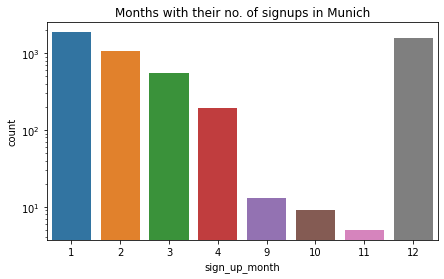

In [34]:
plt.figure(figsize = (7, 4))
munich_plot = sns.countplot(x = "sign_up_month", data = munich_df)
munich_plot.set_yscale("log")
#from the graph we can see that the month with the 3rd lowest number of sign ups in Munich is September
plt.title("Months with their no. of signups in Munich")
plt.show()

In [35]:
df_dropnull_driver_first_trip = new_df.dropna(subset = ["driver_first_trip_date"])

In [36]:
df_dropnull_driver_first_trip.shape

(6596, 22)

In [37]:
df_dropnull_driver_first_trip.tail()

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,car_factory_year,brand_id,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips,sign_up_month
15312,8470312006996,Driver from fleet,Riyadh,Sign up,2021-04-11,Regular,2021-04-11,Bind car,2021-04-11,Available,...,2011.0,1013819.0,NaN,2021-04-11,2021-04-11,2021-04-13,2021-04-11,38.0,32.0,4
15318,8470312007134,Driver from fleet,Panama City,Sign up,2021-04-11,Regular,2021-04-11,Bind car,2021-04-11,Available,...,2010.0,1014232.0,NaN,2021-04-11,2021-04-11,2021-04-12,2021-04-11,33.0,29.0,4
15333,8470312007353,Driver from fleet,Munich,Sign up,2021-04-12,Regular,2021-04-12,Bind car,2021-04-12,Available,...,2011.0,1014091.0,NaN,2021-04-12,2021-04-13,2021-04-13,2021-04-13,15.0,11.0,4
15334,8470312007376,Driver from fleet,Munich,Sign up,2021-04-11,Regular,2021-04-12,Bind car,2021-04-12,Available,...,2013.0,1014243.0,NaN,2021-03-22,2021-04-12,2021-04-13,2021-04-12,28.0,23.0,4
15336,8470312007380,Driver from fleet,Riyadh,Sign up,2021-04-11,Regular,2021-04-11,Bind car,2021-04-12,Available,...,2009.0,1014790.0,NaN,2021-04-11,2021-04-12,2021-04-13,2021-04-12,24.0,14.0,4


In [38]:
#df_dropnull_driver_first_trip.loc[:, "sign_up_date"].dt.month
df_dropnull_driver_first_trip.loc[:, "time_to_complete_funnel"] = (df_dropnull_driver_first_trip["driver_first_trip_date"]-df_dropnull_driver_first_trip["sign_up_date"]).dt.days

C:\Users\Adetola Oluwaseyi\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Adetola Oluwaseyi\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [39]:
df_dropnull_driver_first_trip["driver_first_trip_date"]-df_dropnull_driver_first_trip["sign_up_date"]

0        35 days
1        34 days
3       136 days
5        41 days
7        11 days
          ...   
15312     0 days
15318     0 days
15333     1 days
15334     1 days
15336     1 days
Length: 6596, dtype: timedelta64[ns]

In [40]:
df_dropnull_driver_first_trip.head()

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,brand_id,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips,sign_up_month,time_to_complete_funnel
0,8470311823362,Driver from fleet,Riyadh,Sign up,2020-12-16,Regular,2020-12-18,Bind car,2020-12-18,Available,...,1014091.0,NaN,2020-12-16,2021-01-20,2021-01-22,2021-01-20,32.0,27.0,12,35
1,8470311842205,Driver from fleet,Panama City,Sign up,2020-12-09,Regular,2021-01-04,Bind car,2021-03-12,Available,...,1014167.0,NaN,2020-09-03,2021-01-12,2021-04-08,2021-03-12,897.0,467.0,12,34
3,8470311842386,Driver from fleet,Panama City,Sign up,2020-09-09,Regular,2020-09-15,Bind car,2021-01-21,Available,...,1014493.0,NaN,2020-09-05,2021-01-23,2021-04-08,2021-01-23,1399.0,948.0,9,136
5,8470311842445,Driver from fleet,Munich,Sign up,2020-12-17,Regular,2020-12-21,Bind car,2021-01-04,Available,...,1014309.0,NaN,2020-09-09,2021-01-27,2021-04-13,2021-01-27,1543.0,1030.0,12,41
7,8470311842465,Driver from fleet,Riyadh,Sign up,2020-12-31,Regular,2021-01-02,Bind car,2020-12-31,Not available,...,1014493.0,NaN,2020-09-08,2021-01-11,2021-03-20,2021-01-11,256.0,212.0,12,11


In [41]:
df_dropnull_driver_first_trip["time_to_complete_funnel"].describe()

count    6596.000000
mean       15.951183
std        16.951549
min       -15.000000
25%         3.000000
50%        12.000000
75%        24.000000
max       206.000000
Name: time_to_complete_funnel, dtype: float64

In [42]:
df_dropnull_driver_first_trip = df_dropnull_driver_first_trip[df_dropnull_driver_first_trip.time_to_complete_funnel >= 0]

In [43]:
df_dropnull_driver_first_trip.describe()

,driver id,car_factory_year,brand_id,acceptance,trips,sign_up_month,time_to_complete_funnel
count,6.593000e+03,6230.000000,6.230000e+03,6593.000000,6593.000000,6593.000000,6593.000000
mean,8.470312e+12,2013.536276,1.014258e+06,264.879114,196.222054,5.370545,15.962839
std,2.551682e+04,4.003957,2.517603e+02,434.930116,310.832106,5.005576,16.946177
min,8.470312e+12,2001.000000,1.013565e+06,1.000000,1.000000,1.000000,0.000000
25%,8.470312e+12,2011.000000,1.014091e+06,22.000000,17.000000,1.000000,3.000000
50%,8.470312e+12,2014.000000,1.014309e+06,104.000000,81.000000,2.000000,12.000000
75%,8.470312e+12,2017.000000,1.014478e+06,291.000000,227.000000,12.000000,24.000000
max,8.470312e+12,2021.000000,1.015148e+06,3984.000000,2733.000000,12.000000,206.000000


In [44]:
q4_groupby = df_dropnull_driver_first_trip.groupby("driver_city_name", as_index = False)["time_to_complete_funnel"].mean() 


In [45]:
q4_groupby.head()

,driver_city_name,time_to_complete_funnel
0,Munich,16.323459
1,Panama City,16.961519
2,Riyadh,14.882772


In [46]:
#from the above, Riyadh has the fastest time for a driver to complete the funnel

In [47]:
new_df.columns

Index(['driver id', 'driver_role', 'driver_city_name', 'sign_up',
       'sign_up_date', 'regular', 'regular_date', 'bind_car', 'bind_car_date',
       'available', 'available_date', 'main_channel', 'car_factory_year',
       'brand_id', 'inn_id', 'first_download_time', 'driver_first_trip_date',
       'driver_last_trip_date', 'car_first_trip_date', 'acceptance', 'trips',
       'sign_up_month'],
      dtype='object')

In [48]:
new_df2 = new_df.dropna(subset = ["regular_date", "bind_car_date"])

In [49]:
new_df2.shape

(8331, 22)

In [50]:
new_df2.isna().sum() #to see whether the null values have been dropped

driver id                    0
driver_role                  0
driver_city_name             0
sign_up                      0
sign_up_date                 0
regular                      0
regular_date                 0
bind_car                     0
bind_car_date                0
available                    0
available_date             810
main_channel                90
car_factory_year           760
brand_id                   760
inn_id                    8156
first_download_time        661
driver_first_trip_date    2141
driver_last_trip_date     2141
car_first_trip_date       2319
acceptance                1974
trips                     1974
sign_up_month                0
dtype: int64

In [51]:
new_df2["regular_year"] = new_df2.loc[:, "regular_date"].dt.year

<ipython-input-51-40a0d7c63749>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2["regular_year"] = new_df2.loc[:, "regular_date"].dt.year


In [52]:
new_df2.head()

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,brand_id,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips,sign_up_month,regular_year
0,8470311823362,Driver from fleet,Riyadh,Sign up,2020-12-16,Regular,2020-12-18,Bind car,2020-12-18,Available,...,1014091.0,NaN,2020-12-16,2021-01-20,2021-01-22,2021-01-20,32.0,27.0,12,2020
1,8470311842205,Driver from fleet,Panama City,Sign up,2020-12-09,Regular,2021-01-04,Bind car,2021-03-12,Available,...,1014167.0,NaN,2020-09-03,2021-01-12,2021-04-08,2021-03-12,897.0,467.0,12,2021
3,8470311842386,Driver from fleet,Panama City,Sign up,2020-09-09,Regular,2020-09-15,Bind car,2021-01-21,Available,...,1014493.0,NaN,2020-09-05,2021-01-23,2021-04-08,2021-01-23,1399.0,948.0,9,2020
5,8470311842445,Driver from fleet,Munich,Sign up,2020-12-17,Regular,2020-12-21,Bind car,2021-01-04,Available,...,1014309.0,NaN,2020-09-09,2021-01-27,2021-04-13,2021-01-27,1543.0,1030.0,12,2020
6,8470311842451,Driver from fleet,Panama City,Sign up,2020-09-07,Regular,2020-09-26,Bind car,2020-10-04,Available,...,1014478.0,NaN,2020-09-07,NaT,NaT,NaT,NaN,NaN,9,2020


In [53]:
new_df2.regular_year.unique()

array([2020, 2021], dtype=int64)

In [54]:
new_df2_remake = new_df2.loc[(new_df2.driver_city_name == "Panama City") & (new_df2.driver_role == "Driver from fleet") & (new_df2.regular_year == 2021)]

In [55]:
new_df2_remake.head()

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,brand_id,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips,sign_up_month,regular_year
1,8470311842205,Driver from fleet,Panama City,Sign up,2020-12-09,Regular,2021-01-04,Bind car,2021-03-12,Available,...,1014167.0,NaN,2020-09-03,2021-01-12,2021-04-08,2021-03-12,897.0,467.0,12,2021
47,8470311842911,Driver from fleet,Panama City,Sign up,2020-12-27,Regular,2021-01-10,Bind car,2021-01-12,Available,...,1014145.0,NaN,2020-09-08,2021-02-05,2021-02-26,2021-02-05,72.0,63.0,12,2021
49,8470311842924,Driver from fleet,Panama City,Sign up,2021-01-01,Regular,2021-01-03,Bind car,2021-01-03,Available,...,1014478.0,NaN,2020-09-09,2021-01-11,2021-04-09,2021-01-11,117.0,92.0,1,2021
72,8470311843125,Driver from fleet,Panama City,Sign up,2021-01-18,Regular,2021-01-20,Bind car,2021-01-21,Available,...,1014232.0,NaN,2021-01-10,2021-01-28,2021-02-28,2021-01-28,72.0,55.0,1,2021
107,8470311843653,Driver from fleet,Panama City,Sign up,2020-12-17,Regular,2021-01-09,Bind car,2021-01-10,Available,...,1014494.0,NaN,2020-12-17,2021-01-15,2021-01-18,2021-01-15,8.0,8.0,12,2021


In [56]:
new_df2_remake = new_df2_remake.reset_index(drop=True)

In [57]:
new_df2_remake

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,brand_id,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips,sign_up_month,regular_year
0,8470311842205,Driver from fleet,Panama City,Sign up,2020-12-09,Regular,2021-01-04,Bind car,2021-03-12,Available,...,1014167.0,NaN,2020-09-03,2021-01-12,2021-04-08,2021-03-12,897.0,467.0,12,2021
1,8470311842911,Driver from fleet,Panama City,Sign up,2020-12-27,Regular,2021-01-10,Bind car,2021-01-12,Available,...,1014145.0,NaN,2020-09-08,2021-02-05,2021-02-26,2021-02-05,72.0,63.0,12,2021
2,8470311842924,Driver from fleet,Panama City,Sign up,2021-01-01,Regular,2021-01-03,Bind car,2021-01-03,Available,...,1014478.0,NaN,2020-09-09,2021-01-11,2021-04-09,2021-01-11,117.0,92.0,1,2021
3,8470311843125,Driver from fleet,Panama City,Sign up,2021-01-18,Regular,2021-01-20,Bind car,2021-01-21,Available,...,1014232.0,NaN,2021-01-10,2021-01-28,2021-02-28,2021-01-28,72.0,55.0,1,2021
4,8470311843653,Driver from fleet,Panama City,Sign up,2020-12-17,Regular,2021-01-09,Bind car,2021-01-10,Available,...,1014494.0,NaN,2020-12-17,2021-01-15,2021-01-18,2021-01-15,8.0,8.0,12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,8470312006988,Driver from fleet,Panama City,Sign up,2021-04-11,Regular,2021-04-13,Bind car,2021-04-11,Not available,...,1015002.0,NaN,2021-04-23,NaT,NaT,NaT,NaN,NaN,4,2021
1766,8470312007074,Driver from fleet,Panama City,Sign up,2021-04-10,Regular,2021-04-10,Bind car,2021-04-11,Available,...,1013718.0,NaN,2021-04-10,NaT,NaT,NaT,NaN,NaN,4,2021
1767,8470312007134,Driver from fleet,Panama City,Sign up,2021-04-11,Regular,2021-04-11,Bind car,2021-04-11,Available,...,1014232.0,NaN,2021-04-11,2021-04-11,2021-04-12,2021-04-11,33.0,29.0,4,2021
1768,8470312007554,Driver from fleet,Panama City,Sign up,2021-04-11,Regular,2021-04-12,Bind car,2021-04-12,Available,...,NaN,NaN,2021-04-11,NaT,NaT,NaT,NaN,NaN,4,2021


In [58]:
new_df2_remake.loc[:, "time_from_regular_to_bind"] = (new_df2_remake["bind_car_date"]-new_df2_remake["regular_date"]).dt.days

In [59]:
new_df2_remake.head()

,driver id,driver_role,driver_city_name,sign_up,sign_up_date,regular,regular_date,bind_car,bind_car_date,available,...,inn_id,first_download_time,driver_first_trip_date,driver_last_trip_date,car_first_trip_date,acceptance,trips,sign_up_month,regular_year,time_from_regular_to_bind
0,8470311842205,Driver from fleet,Panama City,Sign up,2020-12-09,Regular,2021-01-04,Bind car,2021-03-12,Available,...,NaN,2020-09-03,2021-01-12,2021-04-08,2021-03-12,897.0,467.0,12,2021,67
1,8470311842911,Driver from fleet,Panama City,Sign up,2020-12-27,Regular,2021-01-10,Bind car,2021-01-12,Available,...,NaN,2020-09-08,2021-02-05,2021-02-26,2021-02-05,72.0,63.0,12,2021,2
2,8470311842924,Driver from fleet,Panama City,Sign up,2021-01-01,Regular,2021-01-03,Bind car,2021-01-03,Available,...,NaN,2020-09-09,2021-01-11,2021-04-09,2021-01-11,117.0,92.0,1,2021,0
3,8470311843125,Driver from fleet,Panama City,Sign up,2021-01-18,Regular,2021-01-20,Bind car,2021-01-21,Available,...,NaN,2021-01-10,2021-01-28,2021-02-28,2021-01-28,72.0,55.0,1,2021,1
4,8470311843653,Driver from fleet,Panama City,Sign up,2020-12-17,Regular,2021-01-09,Bind car,2021-01-10,Available,...,NaN,2020-12-17,2021-01-15,2021-01-18,2021-01-15,8.0,8.0,12,2021,1


In [60]:
new_df2_remake["time_from_regular_to_bind"].describe()

count    1770.000000
mean        5.020904
std        16.008093
min       -91.000000
25%         0.000000
50%         0.000000
75%         3.000000
max       100.000000
Name: time_from_regular_to_bind, dtype: float64

In [61]:
new_df2_remake = new_df2_remake[new_df2_remake.time_from_regular_to_bind >= 0]

In [62]:
new_df2_remake["time_from_regular_to_bind"].describe()

count    1556.000000
mean        6.848329
std        15.730246
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       100.000000
Name: time_from_regular_to_bind, dtype: float64

In [63]:
q5_groupby = new_df2_remake.groupby("driver_city_name")["time_from_regular_to_bind"].mean()

In [64]:
print(q5_groupby.head())

driver_city_name
Panama City    6.848329
Name: time_from_regular_to_bind, dtype: float64
